Pbm 1-6

In [26]:
import numpy as np
from scipy import linalg as la
import scipy as sy
import sympy as sy
from matplotlib import pyplot as plt

Ex. ill-conditioned matrice

In [35]:
A = np.array([[1,1],[1,1+1e-10]])
np.linalg.cond(A)

39999991794.0589

In [36]:
b1 = np.array([2,2])
x1=la.solve(A, b1)
print(x1)

[2. 0.]


In [6]:
b2 = np.array([2,2+1e-5])
la.norm(b1-b2)
x2 = la.solve(A, b2)
print(x2)

[-99997.99172662  99999.99172662]


#### Pbm1

In [16]:
def conditionnum(A):
    cn = max(sy.linalg.svdvals(A))/min(sy.linalg.svdvals(A))
    if cn == 0:
        return np.inf
    else:
        return cn

In [18]:
conditionnum(A) == np.linalg.cond(A)

True

In [24]:
conditionnum(la.qr(A)[0])

1.0000000000000002

Ex. Wilkinson polynomial Example

In [34]:
w_roots = np.arange(1, 21)
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i,1,20)))[0]
w_coeffs = np.array(w.all_coeffs())
print(w_coeffs[:6])

#perturb
h = np.zeros(21)
h[1] = 1e-7
new_coeffs = w_coeffs-h
new_roots = np.roots(np.poly1d(new_coeffs))
print(new_roots)

w_roots = np.sort(w_roots)
new_roots = np.sort(new_roots)

k = la.norm(new_roots-w_roots, np.inf)/la.norm(h, np.inf)
k*la.norm(w_coeffs, np.inf)/la.norm(w_roots, np.inf)

[1 -210 20615 -1256850 53327946 -1672280820]
[20.78883021+0.j         19.45968478+1.87437546j 19.45968478-1.87437546j
 16.72515627+2.73162516j 16.72515627-2.73162516j 14.01136914+2.44967592j
 14.01136914-2.44967592j 11.82164339+1.59965682j 11.82164339-1.59965682j
 10.12125697+0.60484031j 10.12125697-0.60484031j  8.92664678+0.j
  8.00661562+0.j          6.9996741 +0.j          6.00001277+0.j
  4.99999952+0.j          4.00000001+0.j          3.        +0.j
  2.        +0.j          1.        +0.j        ]


1.95063629993970e+25

#### Pbm 2

In [266]:
w_roots = np.arange(1, 21)
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i,1,20)))[0]
w_coeffs = np.array(w.all_coeffs())
print(w_coeffs[:6])

#perturb
h = np.zeros(21)
h[1] = 1e-7
new_coeffs = w_coeffs-h
new_roots = np.roots(np.poly1d(new_coeffs))
print(new_roots)

[1 -210 20615 -1256850 53327946 -1672280820]
[20.78883021+0.j         19.45968478+1.87437546j 19.45968478-1.87437546j
 16.72515627+2.73162516j 16.72515627-2.73162516j 14.01136914+2.44967592j
 14.01136914-2.44967592j 11.82164339+1.59965682j 11.82164339-1.59965682j
 10.12125697+0.60484031j 10.12125697-0.60484031j  8.92664678+0.j
  8.00661562+0.j          6.9996741 +0.j          6.00001277+0.j
  4.99999952+0.j          4.00000001+0.j          3.        +0.j
  2.        +0.j          1.        +0.j        ]


In [99]:
def get_new_roots():
    h = np.random.normal(1,1e-10, 21)
    new_coeffs = w_coeffs*h
    new_roots = np.roots(np.poly1d(new_coeffs))
    return new_roots

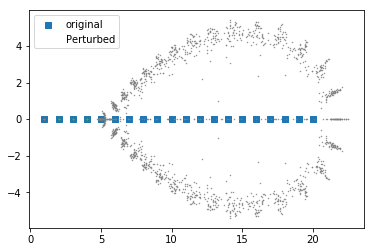

In [112]:
fig,ax = plt.subplots()
ax.scatter(w_roots, np.zeros(len(w_roots)), label='original', marker=',')
new_roots = get_new_roots()
ax.scatter(new_roots.real, new_roots.imag, label='Perturbed', marker=',',c='grey', s=0.2)
for i in range(100):
    newroots = get_new_roots()
    ax.scatter(newroots.real, newroots.imag, c='grey', s=0.2)

ax.legend()
plt.show()

In [125]:
#absolute cond num
h = np.random.normal(1,1e-10, 21)
new_coeffs = w_coeffs*h
new_roots = np.roots(np.poly1d(new_coeffs))
k = la.norm(new_roots-w_roots, np.inf)/la.norm(h, np.inf)
print(k)

19.481210379252293


In [132]:
#relative cond num
k*la.norm(w_coeffs, np.inf)/la.norm(w_roots, np.inf)

1.34456973892665e+19

#### Pbm 3

In [146]:
reals = np.random.normal(0, 1e-10, A.shape)
imags = np.random.normal(0, 1e-10, A.shape)
H = reals + 1j*imags
H+A

array([[1.+1.82202478e-12j, 1.+9.59768022e-11j],
       [1.-9.15228578e-11j, 1.-3.04757897e-11j]])

In [158]:
def connum(A):
    absnum = la.norm(la.eigvals(A)-la.eigvals(A+H))/la.norm(H)
    relnum = (la.norm(A)/la.norm(la.eigvals(A)))*absnum
    return absnum, relnum

In [159]:
connum(A)

(10320256707.49695, 10320256707.49695)

#### Pbm 4

In [250]:
def bounds(xmin, xmax, ymin, ymax, res):
    nums = []
    x = xmin
    step = (xmax-xmin)/res
    while x<xmax:
    #for x in np.linspace(xmin, xmax, res):
        for y in np.linspace(ymin, ymax, res):
            res = connum([[1,x],[y,1]])[1]
            nums.append(res)
        x+=step
    return nums

In [252]:
xmin, xmax, ymin, ymax, res = -100,100,-100,100,200
results = bounds(-100, 100, ymin, ymax, 200)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


In [257]:
len(results)

200

In [201]:
y, x = np.mgrid[ymin:ymax,xmin:xmax]

In [202]:
Znew=np.reshape(res,(len(x[:,0]),len(x[0,:])))

ValueError: cannot reshape array of size 200 into shape (200,200)

In [197]:
plt.pcolormesh(y,x,res,cmap='gray-r')

ValueError: not enough values to unpack (expected 2, got 1)

#### Pbm 5

In [267]:
computed_roots = np.sort(np.poly1d(w_coeffs))
print(computed_roots[:6])

[-12870931245150988800 -8752948036761600000 -3599979517947607200
 -311333643161390640 -10142299865511450 -135585182899530]


In [268]:
#forward error
forward_error = la.norm(w_roots - computed_roots)
print(forward_error)

ValueError: operands could not be broadcast together with shapes (20,) (21,) 

In [269]:
len(w_roots)

20